# How to use OpenCV to segment the cells

## Package inclusion for Python

In [1]:
%matplotlib inline

import numpy as np
import cv2
from matplotlib import pyplot as plt

## Read the image from a file on the disk and return a new matrix

![Input image.](../cells_greyscale.png)

In [2]:
image = cv2.imread("../cells_greyscale.png", cv2.IMREAD_GRAYSCALE)

## Check for errors

In [3]:
# Check for failure
if image is None: 
    raise Exception("Could not open or find the image")

## Compute its histogram

In [4]:
histogram_size = 255

histogram = cv2.calcHist(image, # Image to analyse
                         [0], # Number of channels
                         None, # Mask
                         [histogram_size], # Number of bins
                         [0, 255]) # Ranges

## Display the image in a window

In [5]:
cv2.namedWindow("Cells", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Cells", image) # Show our image inside the created window.

## Plot the histogram

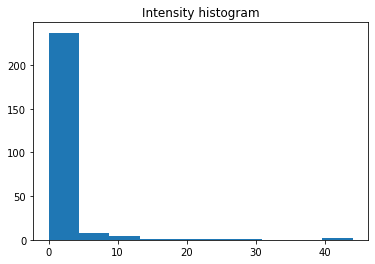

In [6]:
plt.hist(histogram.ravel())
plt.title('Intensity histogram')
plt.show()

In [7]:
cv2.waitKey(0) # Wait for any keystroke in the window
cv2.destroyWindow("Cells") # Destroy the created window

A window will open:

![OpenCV window](../opencv-cxx-load-display.png)

## Binary threshold

A lot of information about the various thresholds technique in OpenCV is available at [https://docs.opencv.org/master/db/d8e/tutorial_threshold.html](https://docs.opencv.org/master/db/d8e/tutorial_threshold.html) on OpenCV's website. We want the background in black, and the cells in white. We use the inverse of the binary threshold then. See `THRESH_BINARY_INV` in [https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576).

In [8]:
threshold_value = 70 # Taken from the histogram
threshold_type = cv2.THRESH_BINARY_INV
max_value = 255
max_type = 4

segmentated = cv2.threshold(image,
          threshold_value,
          max_value,
          threshold_type)[1]

## Display the result

In [9]:
cv2.namedWindow("Cells", cv2.WINDOW_GUI_EXPANDED); # Create a window
cv2.imshow("Cells", image) # Show our image inside the created window.

cv2.namedWindow("Segmentation", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Segmentation", segmentated) # Show our image inside the created window.

cv2.waitKey(0) # Wait for any keystroke in the window
cv2.destroyAllWindows() # Destroy all the created windows

You'll see:

![opencv-cxx-threshold1.png](../opencv-cxx-threshold1.png)

which is not perfect. Remember mathematical morphology? Opening? Closing? Have a look at [https://docs.opencv.org/master/d3/dbe/tutorial_opening_closing_hats.html](https://docs.opencv.org/master/d3/dbe/tutorial_opening_closing_hats.html). 

And let's do some cleaning.

## Cleaning

In [10]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,
                                    (5, 5), 
                                    (2, 2))

segmentated = cv2.morphologyEx(segmentated, cv2.MORPH_CLOSE, element);
segmentated = cv2.morphologyEx(segmentated, cv2.MORPH_OPEN, element);

In [11]:
cv2.namedWindow("Cells", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Cells", image) # Show our image inside the created window.

cv2.namedWindow("Segmentation", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Segmentation", segmentated) # Show our image inside the created window.

cv2.waitKey(0) # Wait for any keystroke in the window
cv2.destroyAllWindows() # Destroy all the created windows

You'll see:

![opencv-cxx-threshold2.png](../opencv-cxx-threshold2.png)

which is much better than the previous one.

## Apply the mask

The threshold provide a binary mask. 

In [12]:
image_of_cells = cv2.bitwise_and(segmentated, image)

In [13]:
cv2.namedWindow("Cells", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Cells", image) # Show our image inside the created window.

cv2.namedWindow("Segmentation", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Segmentation", segmentated) # Show our image inside the created window.

cv2.namedWindow("Just the cells", cv2.WINDOW_GUI_EXPANDED) # Create a window
cv2.imshow("Just the cells", image_of_cells) # Show our image inside the created window.

cv2.waitKey(0) # Wait for any keystroke in the window
cv2.destroyAllWindows() # Destroy all the created windows

You'll see:

![opencv-cxx-threshold3.png](../opencv-cxx-threshold3.png)

The background has been removed.